Weights for tau = 0:
 [[ -3.04634035e+00]
 [  4.47411947e-03]
 [  4.82210324e+01]
 [  1.24703504e+01]]
Approximate solution:
 [[  9.98533429]
 [ 12.52841566]
 [ 12.83223189]
 [ 10.09617892]
 [ 12.77200499]
 [ 12.02023692]
 [ 14.73405083]
 [ 12.30473069]
 [ 11.20856538]
 [ 13.96321938]
 [ 12.83972502]
 [ 13.28943508]
 [  8.51191245]
 [ 12.44256772]
 [ 12.84802818]
 [ 15.49827955]
 [ 15.70974808]
 [  5.46899906]
 [  9.81342983]
 [ 12.6520027 ]
 [  9.11979352]
 [ 10.34902599]
 [  7.39074273]
 [ 10.05332065]
 [ 15.04207671]
 [ 12.059035  ]
 [ 13.91855966]
 [  8.82489468]
 [ 11.12575365]
 [ 14.22795374]
 [ 15.40708524]
 [ 10.15759099]
 [ 13.39458403]
 [ 10.34902599]
 [  8.85597407]
 [ 14.62377614]
 [ 14.89789368]
 [ 13.05254531]
 [  7.24800186]
 [  6.54324778]
 [  9.29364849]
 [  5.56893862]
 [ 13.684919  ]
 [ 16.4417421 ]
 [ 12.15107187]
 [ 10.2703491 ]
 [ 17.53494729]
 [  9.17909114]
 [  9.13258281]
 [ 14.5046518 ]
 [ 16.30662832]
 [ 12.27581575]
 [ 11.43707031]
 [ 10.20816183]]


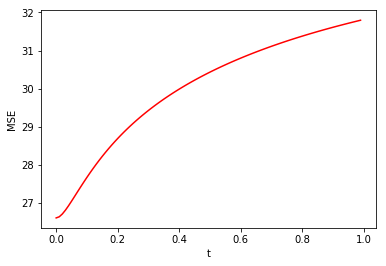

In [13]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt 

def read_data(file_path):
    matrix = list()
    vector = list()
    with open(file_path, newline='') as file:
        reader = csv.reader(file, delimiter=',', quotechar='|')
        next(reader)
        for row in reader:
            matrix_row = list()
            for i in range(0, 4):
                matrix_row.append(float(row[i]))
            matrix.append(matrix_row)
            vector.append(float(row[4]))
    return [matrix, vector]

def solve_svd(X, y, tau):
    U, S, V = np.linalg.svd(X, full_matrices=False)
    D = np.zeros((4, 4))
    for idx in range(0, 4):
        D[idx, idx] = S[idx] / (S[idx]**2 + tau)
    first = np.dot(V.transpose(), D)
    sec = np.dot(first, U.transpose())
    a = np.dot(sec, y)
    return a

def find_mean_square_error(X, weight_vector, output_vector):
    size = output_vector.shape[0]
    difference = np.power(np.matrix(np.dot(X, weight_vector) - output_vector), 2)
    return np.sum(difference, axis=None) / size

[matrix, vector] = read_data('basketball.csv')
X = np.matrix(matrix)
y = np.matrix(vector).transpose()

solution = solve_svd(X, y, 0.0)
print("Weights for tau = 0:\n", solution)
print("Approximate solution:\n", np.dot(X, solution))

t_array = []
mse_array = []
for t in np.arange(0.0, 1.0, 0.01):
    solution = solve_svd(X, y, t)
    mse = find_mean_square_error(X, solution, y)
    
    t_array.append(t)
    mse_array.append(mse)
    
    
plt.plot(t_array, mse_array, 'r') 
plt.xlabel('t')
plt.ylabel('MSE')
plt.show()